In [ ]:
# 코랩에서 한글 라이브러리 라이브러리 설치합니다.
#!pip install koreanize-matplotlib --quiet


In [33]:
# 라이브러리 불러오기
import numpy as np   #넘파이 라이브러리(수치관련)
import pandas as pd  #판다스 라이브러리(데이터분석)
import seaborn as sns #시각화 라이브러리
import matplotlib.pyplot as plt #시각화 라이브러리
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import set_matplotlib_formats
pd.set_option('display.max_columns', None)  #df.head()할때 모든 컬럼 표시되게

#쥬피터노트북
plt.rc('font', family='Malgun Gothic') #맥 Apple Gothic

# matplotlib에 한국어 표시를 위해 koreanize_matplotlib를 import하고 한국어 표시가 되는지 테스트합니다.
#import koreanize_matplotlib  #코랩에서 한글

In [ ]:

df = pd.read_csv('./busan_combine.csv', encoding='cp949')
df.info()

In [54]:
columns_to_drop = [col for col in df.columns if '광안' in col or '남천' in col] #남천, 광안

# 해당 컬럼 삭제
df.drop(columns=columns_to_drop, inplace=True)
df.drop(columns=['Unnamed: 49','Unnamed: 50','Unnamed: 51','전체'], inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            596 non-null    object 
 1   민락동 185-5     596 non-null    int64  
 2   민락동 175-20    596 non-null    int64  
 3   민락동 171-15    596 non-null    int64  
 4   민락동 175-16    596 non-null    int64  
 5   민락동 178-12    596 non-null    int64  
 6   민락동 205-8     596 non-null    int64  
 7   민락동 176-33    596 non-null    int64  
 8   민락동 18-14     596 non-null    int64  
 9   민락동 33-5      596 non-null    int64  
 10  민락동 192-4     596 non-null    int64  
 11  민락동 745-3     596 non-null    int64  
 12  민락동 110-75    596 non-null    int64  
 13  민락동 113-33    596 non-null    int64  
 14  민락수변공원(1)     596 non-null    int64  
 15  민락동 110-88    596 non-null    int64  
 16  민락동 110-17    596 non-null    int64  
 17  민락동 181-201   596 non-null    int64  
 18  민락동 181-87    596 non-null    

In [58]:
import numpy as np
cols = df.select_dtypes(include=np.number).columns.tolist()
print(cols)
df['합계'] = df[cols].sum(axis=1)
df

['민락동 185-5 ', '민락동 175-20 ', '민락동 171-15 ', '민락동 175-16 ', '민락동 178-12 ', '민락동 205-8 ', '민락동 176-33 ', '민락동 18-14 ', '민락동 33-5 ', '민락동 192-4 ', '민락동 745-3 ', '민락동 110-75 ', '민락동 113-33 ', '민락수변공원(1) ', '민락동 110-88 ', '민락동 110-17 ', '민락동 181-201 ', '민락동 181-87 ', '민락동 113-45 ', '합계']


,날짜,민락동 185-5,민락동 175-20,민락동 171-15,민락동 175-16,민락동 178-12,민락동 205-8,민락동 176-33,민락동 18-14,민락동 33-5,민락동 192-4,민락동 745-3,민락동 110-75,민락동 113-33,민락수변공원(1),민락동 110-88,민락동 110-17,민락동 181-201,민락동 181-87,민락동 113-45,합계
0,01/12/2021,9010,1241,1594,2743,2396,4383,7604,2372,3631,5888,3624,2557,3180,2431,2319,424,2665,4295,2328,129370.0
1,02/12/2021,9224,1067,1535,2809,2289,4511,7864,2279,3767,5759,3792,2740,3360,2952,2473,423,2477,4222,2550,132186.0
2,03/12/2021,11631,1358,1686,3489,3349,5957,10190,2715,4067,7152,4384,3093,4063,3230,2937,485,3315,5318,3095,163028.0
3,04/12/2021,16897,1705,2340,5634,5128,8567,14467,2637,5168,8875,5003,3766,6231,4654,3889,734,4788,7708,4599,225580.0
4,05/12/2021,12463,1474,2077,4433,3997,7089,11603,2193,3506,6975,3813,3508,5692,4242,3456,622,4046,5671,4126,181972.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,27/08/2023,14971,16832,17694,2264,4203,7600,8383,10875,1885,677,7406,3487,3169,2528,3295,3863,3562,4064,3780,255159.0
592,28/08/2023,10917,10972,13070,1869,2638,5381,5430,6115,2356,654,7103,3305,2096,1896,2332,2995,2669,3144,2834,185832.0
593,29/08/2023,7578,8104,9717,1464,1813,3861,4064,2174,1908,572,5761,2882,1663,1470,1601,2275,1980,2604,2445,135520.0
594,30/08/2023,8475,9654,10925,1619,2061,3959,4461,1378,2186,549,5894,2790,2109,1711,1930,2733,2166,2760,2745,148855.0


In [ ]:
#np.where(df['요일'].isin([5,6]),1,0)

In [59]:
df['날짜']= pd.to_datetime(df['날짜'])
df['년도']=df['날짜'].dt.year
df['월']=df['날짜'].dt.month
df['요일']=df['날짜'].dt.dayofweek
df['공휴일'] = np.where(df['요일'].isin([5,6]),1,0)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   날짜            596 non-null    datetime64[ns]
 1   민락동 185-5     596 non-null    int64         
 2   민락동 175-20    596 non-null    int64         
 3   민락동 171-15    596 non-null    int64         
 4   민락동 175-16    596 non-null    int64         
 5   민락동 178-12    596 non-null    int64         
 6   민락동 205-8     596 non-null    int64         
 7   민락동 176-33    596 non-null    int64         
 8   민락동 18-14     596 non-null    int64         
 9   민락동 33-5      596 non-null    int64         
 10  민락동 192-4     596 non-null    int64         
 11  민락동 745-3     596 non-null    int64         
 12  민락동 110-75    596 non-null    int64         
 13  민락동 113-33    596 non-null    int64         
 14  민락수변공원(1)     596 non-null    int64         
 15  민락동 110-88    596 non-null    int64     

<ipython-input-59-d8602a05bb11>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['날짜']= pd.to_datetime(df['날짜'])


In [ ]:
#df.loc[df.공휴일==0].tail()

In [64]:
#날짜컬럼 삭제
df.drop(columns='날짜', inplace=True)

In [28]:
df.년도.unique()

array([2021, 2022, 2023])

<Axes: xlabel='년도', ylabel='합계'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing

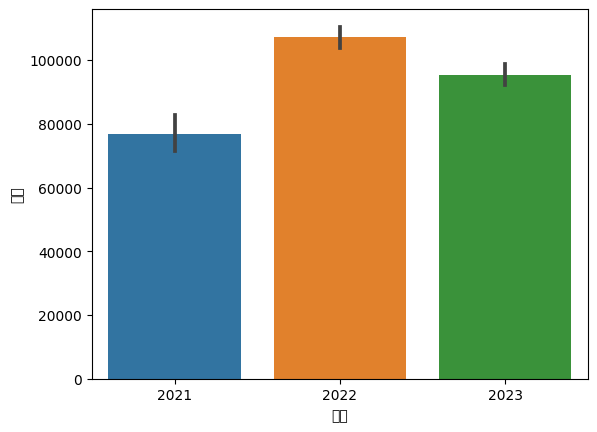

In [34]:
import seaborn as sns
sns.barplot(data = df, x='년도',y='합계')

In [92]:
#이상치 제거, 표준화 방법 사용
from scipy.stats import zscore

# Z-Score 계산
z_scores = zscore(df['합계'])

# 특정 임계값 설정 (예: 3)
threshold = 2

# Z-Score가 임계값을 초과하는 데이터의 인덱스값 저장
outliers = df[(np.abs(z_scores) > threshold)].index
print(outliers)

#print(df[df.index.isin(outliers)])
#이상치데이터 삭제
df.drop(outliers,inplace=True )


Int64Index([ 63,  64,  92, 100, 105, 112, 127, 141, 144, 162, 168, 171, 178,
            185, 199, 200, 206, 214, 220, 275, 289, 353, 492, 499, 506, 507,
            527, 577, 590],
           dtype='int64')


In [80]:
df.shape

(593, 24)

In [93]:
df2 = df[['년도','월','요일','공휴일','합계']]
#df2.to_csv('test.csv',encoding='utf-8-sig',index=False)

In [94]:
#원-핫인코딩
df_dummies = pd.get_dummies(df2, columns=['년도', '월', '요일','공휴일'])
df_dummies

,합계,년도_2021,년도_2022,년도_2023,월_1,월_2,월_3,월_4,월_5,월_6,월_7,월_8,월_9,월_10,월_11,월_12,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,공휴일_0,공휴일_1
0,129370.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,132186.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,163028.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,225580.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,181972.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,255159.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
592,185832.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
593,135520.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
594,148855.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [95]:
from sklearn.model_selection import train_test_split

X = df_dummies.drop('합계', axis=1)
y = df_dummies['합계']

# X_train = X.iloc[:480]
# X_test = X.iloc[480:]
# y_train = y.iloc[:480]
# y_test = y.iloc[480:]

#학습데이터와 테스트데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape

((435, 24), (109, 24))

In [105]:
#베이스모델인 LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred =lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

40446.07859820871

In [85]:
def plot_pred_actual(pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='gray')
    plt.scatter(df.index, df['prediction'], marker='x', color='r')

    plt.legend(['prediction', 'actual'], fontsize=12)

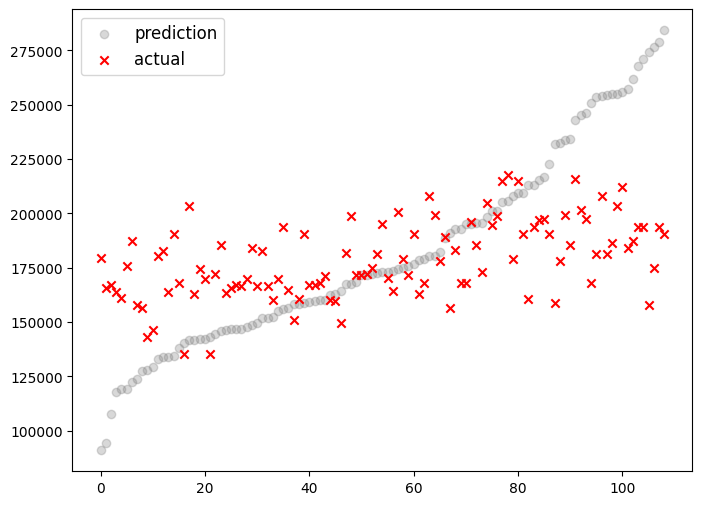

In [97]:
plot_pred_actual(y_pred, y_test)

In [104]:
#랜덤포레스트 사용
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred =rf.predict(X_test)
np.sqrt(mean_squared_error(y_test, rf_pred))

47733.235503577984

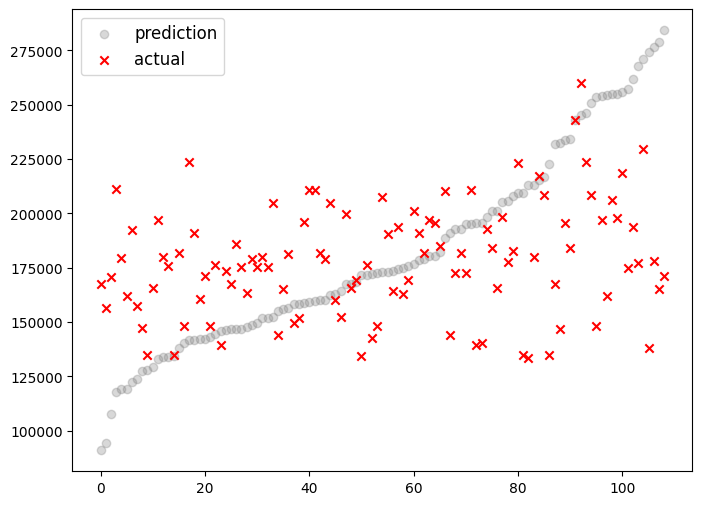

In [103]:
plot_pred_actual(rf_pred, y_test)

In [ ]:
b